<a href="https://colab.research.google.com/github/mpatel5/FoundationsOfDataScience/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CSCI 118 Capstone Project - Recidivism and Reentry Services
# Author: Mitesh Patel
# Description: Analysis of recidivism rates and the impact of reentry services using BJS data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [15]:
# Research Question:
# Do reentry conditions such as mental health treatment, cognitive education, or employment exemption influence 3-year recidivism rates?

In [14]:
from google.colab import files
uploaded = files.upload()

Saving NIJ_s_Recidivism_Challenge_Full_Dataset.csv to NIJ_s_Recidivism_Challenge_Full_Dataset (1).csv


In [16]:
# Load dataset
df = pd.read_csv('NIJ_s_Recidivism_Challenge_Full_Dataset.csv')

In [17]:
df.head()

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [18]:
# Display dataset dimensions
print("Dataset dimensions (rows, columns):", df.shape)

Dataset dimensions (rows, columns): (25835, 54)


In [32]:
# Select relevant columns for analysis
columns_of_interest = [
    'Gender', 'Race', 'Age_at_Release',
    'Condition_MH_SA', 'Condition_Cog_Ed', 'Employment_Exempt',
    'Recidivism_Within_3years'
]
data = df[columns_of_interest].copy()

In [33]:
# Clean and convert categorical variables
data['Gender'] = data['Gender'].str.lower().str.strip()
data['Race'] = data['Race'].str.lower().str.strip()
data['Age_at_Release'] = data['Age_at_Release'].str.strip()

In [34]:
# Summary: Recidivism by MH/SA + Cognitive Education + Employment
summary = data.groupby(['Condition_MH_SA', 'Condition_Cog_Ed', 'Employment_Exempt'])['Recidivism_Within_3years'].mean().reset_index()
summary.columns = ['Mental Health/Substance Abuse', 'Cognitive Education', 'Employment Exempt', 'Recidivism Rate']

In [35]:
# Statistical tests
contingency_cog = pd.crosstab(data['Condition_Cog_Ed'], data['Recidivism_Within_3years'])
chi2_cog, p_cog, _, _ = chi2_contingency(contingency_cog)

contingency_mh = pd.crosstab(data['Condition_MH_SA'], data['Recidivism_Within_3years'])
chi2_mh, p_mh, _, _ = chi2_contingency(contingency_mh)

contingency_emp = pd.crosstab(data['Employment_Exempt'], data['Recidivism_Within_3years'])
chi2_emp, p_emp, _, _ = chi2_contingency(contingency_emp)

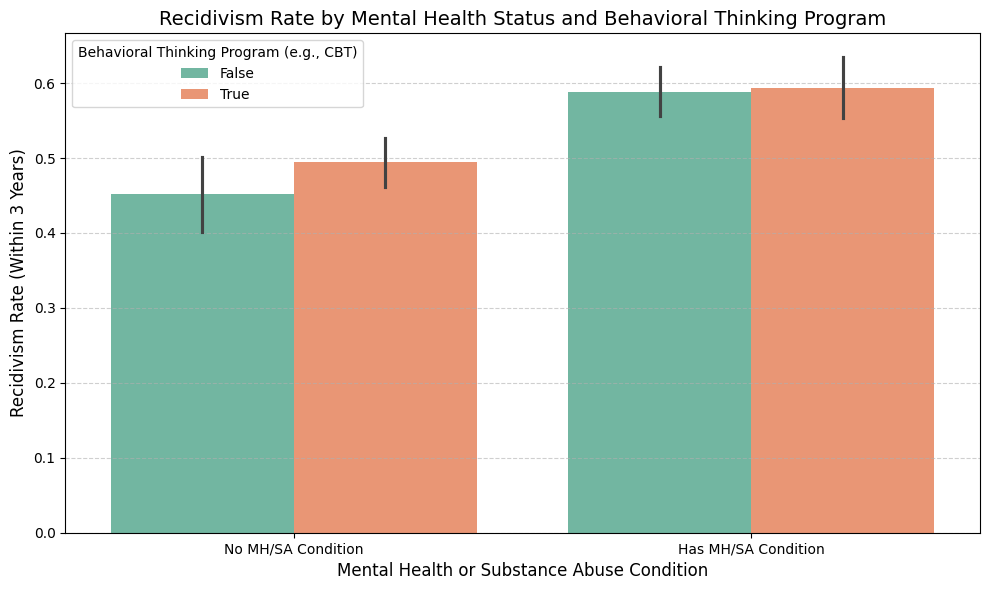


Note:
'Cognitive Education' refers to structured behavioral intervention programs, such as Cognitive Behavioral Therapy (CBT) or Thinking for a Change,
designed to help individuals improve decision-making and reduce criminal thinking patterns.

Important:
The chart shows that recidivism is highest for individuals with both mental health/substance abuse (MH/SA) conditions AND participation in cognitive education.
This does not mean these programs cause recidivism. Instead, it likely reflects that higher-risk individuals (those with MH/SA conditions) are more likely
to be referred to such programs. These individuals may need additional support — such as mental health care or addiction recovery — beyond behavioral training.



In [36]:
# Chart 1: MH/SA + Cognitive Education
plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary,
    x='Mental Health/Substance Abuse',
    y='Recidivism Rate',
    hue='Cognitive Education',
    palette='Set2'
)
plt.title('Recidivism Rate by Mental Health Status and Behavioral Thinking Program', fontsize=14)
plt.xlabel('Mental Health or Substance Abuse Condition', fontsize=12)
plt.ylabel('Recidivism Rate (Within 3 Years)', fontsize=12)
plt.xticks([0, 1], ['No MH/SA Condition', 'Has MH/SA Condition'])
plt.legend(title='Behavioral Thinking Program (e.g., CBT)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Explanation Note
explanation_note = """
Note:
'Cognitive Education' refers to structured behavioral intervention programs, such as Cognitive Behavioral Therapy (CBT) or Thinking for a Change,
designed to help individuals improve decision-making and reduce criminal thinking patterns.

Important:
The chart shows that recidivism is highest for individuals with both mental health/substance abuse (MH/SA) conditions AND participation in cognitive education.
This does not mean these programs cause recidivism. Instead, it likely reflects that higher-risk individuals (those with MH/SA conditions) are more likely
to be referred to such programs. These individuals may need additional support — such as mental health care or addiction recovery — beyond behavioral training.
"""
print(explanation_note)

<ipython-input-37-8e5b6e56c7fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emp_summary, x='Employment_Exempt', y='Recidivism_Within_3years', palette='coolwarm')


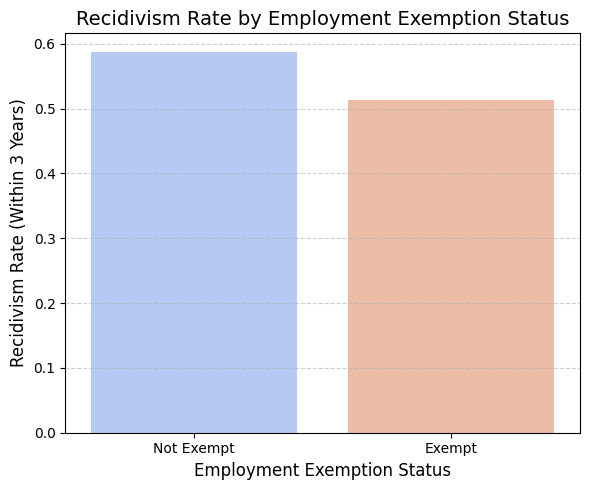

In [37]:
# Chart 2: Recidivism by Employment Exempt
emp_summary = data.groupby('Employment_Exempt')['Recidivism_Within_3years'].mean().reset_index()
emp_summary['Employment_Exempt'] = emp_summary['Employment_Exempt'].replace({True: 'Exempt', False: 'Not Exempt'})

plt.figure(figsize=(6, 5))
sns.barplot(data=emp_summary, x='Employment_Exempt', y='Recidivism_Within_3years', palette='coolwarm')
plt.title('Recidivism Rate by Employment Exemption Status', fontsize=14)
plt.ylabel('Recidivism Rate (Within 3 Years)', fontsize=12)
plt.xlabel('Employment Exemption Status', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-38-2d4d7df97ec4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_summary, x='Age_at_Release', y='Recidivism_Within_3years', palette='viridis')


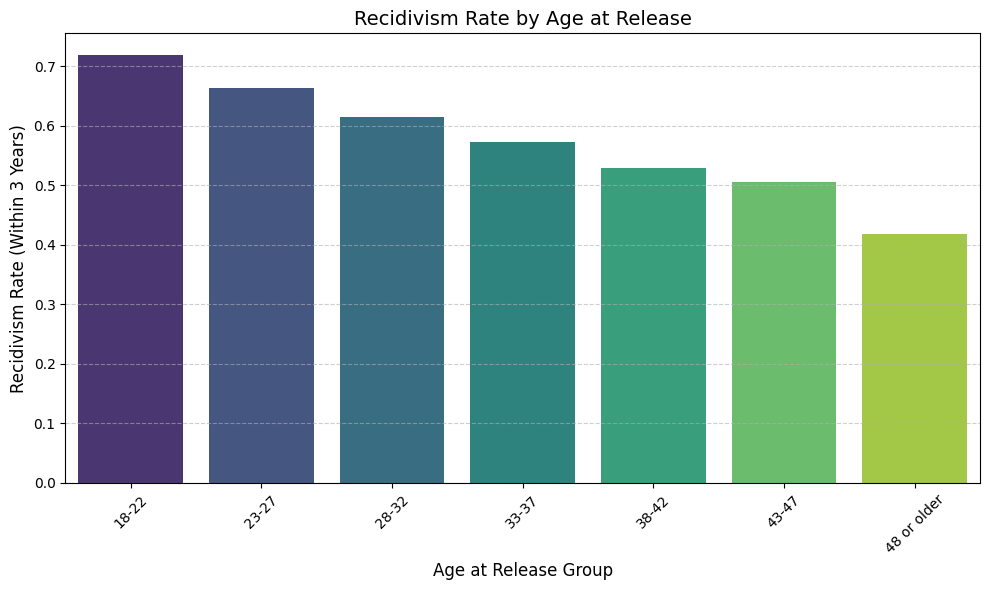

In [38]:
# Chart 3: Recidivism by Age at Release
age_summary = data.groupby('Age_at_Release')['Recidivism_Within_3years'].mean().reset_index()
age_summary = age_summary.sort_values('Recidivism_Within_3years', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=age_summary, x='Age_at_Release', y='Recidivism_Within_3years', palette='viridis')
plt.title('Recidivism Rate by Age at Release', fontsize=14)
plt.ylabel('Recidivism Rate (Within 3 Years)', fontsize=12)
plt.xlabel('Age at Release Group', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [39]:
# Print Summary Tables and Stats
print("\nRecidivism Rates by Reentry Conditions:")
print(summary)

print("\nChi-Square Test Results:")
print(f"Cognitive Education: Chi2 = {chi2_cog:.2f}, p = {p_cog:.2e}")
print(f"Mental Health/Substance Abuse: Chi2 = {chi2_mh:.2f}, p = {p_mh:.2e}")
print(f"Employment Exempt: Chi2 = {chi2_emp:.2f}, p = {p_emp:.2e}")


Recidivism Rates by Reentry Conditions:
   Mental Health/Substance Abuse  Cognitive Education  Employment Exempt  \
0                          False                False              False   
1                          False                False               True   
2                          False                 True              False   
3                          False                 True               True   
4                           True                False              False   
5                           True                False               True   
6                           True                 True              False   
7                           True                 True               True   

   Recidivism Rate  
0         0.501047  
1         0.401606  
2         0.526937  
3         0.461268  
4         0.620838  
5         0.555649  
6         0.634618  
7         0.552912  

Chi-Square Test Results:
Cognitive Education: Chi2 = 36.19, p = 1.79e-09
Mental Heal

In [40]:
# Final Conclusion
print("\nConclusion:")
print("- Mental health/substance abuse is the strongest predictor of recidivism.")
print("- Cognitive education and employment exemptions are also significantly related to recidivism.")
print("- Recidivism rates are highest among younger individuals and those exempt from employment.")


Conclusion:
- Mental health/substance abuse is the strongest predictor of recidivism.
- Cognitive education and employment exemptions are also significantly related to recidivism.
- Recidivism rates are highest among younger individuals and those exempt from employment.
